This notebook focuses on teaching the ability to create Area plot, Histogram and Bar charts on a dataset

In [82]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [83]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df_can.set_index('Country',inplace=True)
df_can.index.name = None
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [84]:
# creating a list of years so that we can use it later on
years = list(map(str, range(1980,2014)))


AREA PLOTS

In [ ]:
# Creating area plot for top 5 countries that contributed most to canada immigration
df_can.sort_values(by ='Total', ascending = False, inplace = True)
top_5 = df_can.head()
top5 = top_5[years].transpose()
top5

In [ ]:
# Plotting 
top5.plot(kind='area', stacked = False, figsize=(20,10), alpha=0.25)
plt.title('Top 5 countires that contributed most to Canadian Immigration')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

TYPES OF PLOTTING  
There are two styles/options for plotting with matplotlib, plotting using the Artist layer and plotting using the Scripting layer.  
OPTION 1: Scripting layer(procedural method)-using matplotlib.pyplot as plt  
We can use plt (eg. matplotlib.pyplot) and add more elements by calling different methods procedurally, for eg plt.title() and so on.  
OPTION 2: Artist layer(object-oriented method) - using an Axes instance from Matplotlib  
We can use Axes instance from our current plot and store it in variable eg ax. We can add more elements by calling methods with little change in syntax eg use ax.set_title instead of plt.title and so on.  
This option is sometimes more transparent and flexible to use for advanced plots, particularly when having multiple plots

In [ ]:
# now plotting this same plot with more flexibility using artist layer
ax = top5.plot(kind='area', stacked = False, figsize=(20,10), alpha=0.25)
ax.set_title('Top 5 countires that contributed most to Canadian Immigration')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')

In [ ]:
 # Now create a stacked area plot of 5 countries that contributed the least to canadian immigration from 1980 to 2013. use transparency value 0.45
# Use the scripting layer
df_can.sort_values(by='Total',ascending= True, inplace= True)
least5= df_can[years].head()
least_5 = least5.transpose()
least_5.plot(kind = 'area', alpha=0.45, figsize=(20,10))
plt.title('Botton 5 countries that countributed least to Canadian Immigration')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

In [ ]:
# Now plot the same plot using Artist layer
ax= least_5.plot(kind = 'area', alpha=0.45, figsize=(20,10))
ax.set_title('Botton 5 countries that countributed least to Canadian Immigration')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')

HISTOGRAMS  
A histogram is a way of representing frequency distribution of numeric dataset. The way it works is that it partitions the x-axis into bins, assign each data point in our dataset to a bin, then counts the number of data points that have been assigned to the bin. So y axis is the frequency or the number of data points in each bin.

In [ ]:
# QUESTION: What is frequency distribution of number of new immigrants from various countries to Canada in 2013
# before we make the histogram lets first examine data split into intervals
# to do this we will use numpy's histogram method to get bin ranges and frequency count as follows
df_can['2013'].head()

In [ ]:
count, bin_edges = np.histogram(df_can['2013'])
print(count)
print(bin_edges)

By default the histogram method breaks up dataset into 10 bins. The above cell summarizes bin ranges and frequency distribution of immigration in 2013.
Meaning 178 countries contribute between 0 to 3412.9 immigrants, 11 countries contribute between 3412.9 and 6825.6 immigrants and so on

In [ ]:
# Now plotting this distribution
df_can['2013'].plot(kind='hist')
plt.title('Frequency distribution of immigrants from 195 countires in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')

In [ ]:
# In the above histogram we notice that x-axis label does not match with the bin size. This can be fixed by passing a keyword as follows:
df_can['2013'].plot(kind='hist', xticks= bin_edges, figsize=(20,10))
plt.title('Frequency distribution of immigrants from 195 countires in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')

Just a side note: We can also use df.plt.hist() instead of df.plot(kind='hist')

In [ ]:
# we can also plot multiple histograms on same plot, lets try to answer this
# What is immigration distribution for Denmark, Norway and Sweden form 1980 to 2013
cont_3 = df_can.loc[['Denmark','Norway','Sweden'],years].head()
cont_3 = cont_3.transpose()
cont_3.plot(kind='hist', alpha = 0.25)

In [ ]:
# Now lets make few modifications to imporove the impact and aesthetics of previous plot
# Lets get the x tick values
count, bin_edges = np.histogram(cont_3, 15)

cont_3.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [ ]:
# for full list of colors available on matplotlib run the following code
for name, hex in mpl.colors.cnames.items():
    print(name, hex)

In [ ]:
# If we do not want plots to overlap each other, we can stack them using stacked parameter
count, bin_edges = np.histogram(cont_3, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
cont3.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

In [95]:
# QUESTION
# Use the scripting layer to display immigration from Greece, Albania and Bulgaria. Use an overlappin plotwith transparency 0.35
cont3 = df_can.loc[['Greece','Albania','Bulgaria'],years].transpose()
# lets get x ticks values
count, bin_edges = np.histogram(cont3, 15)


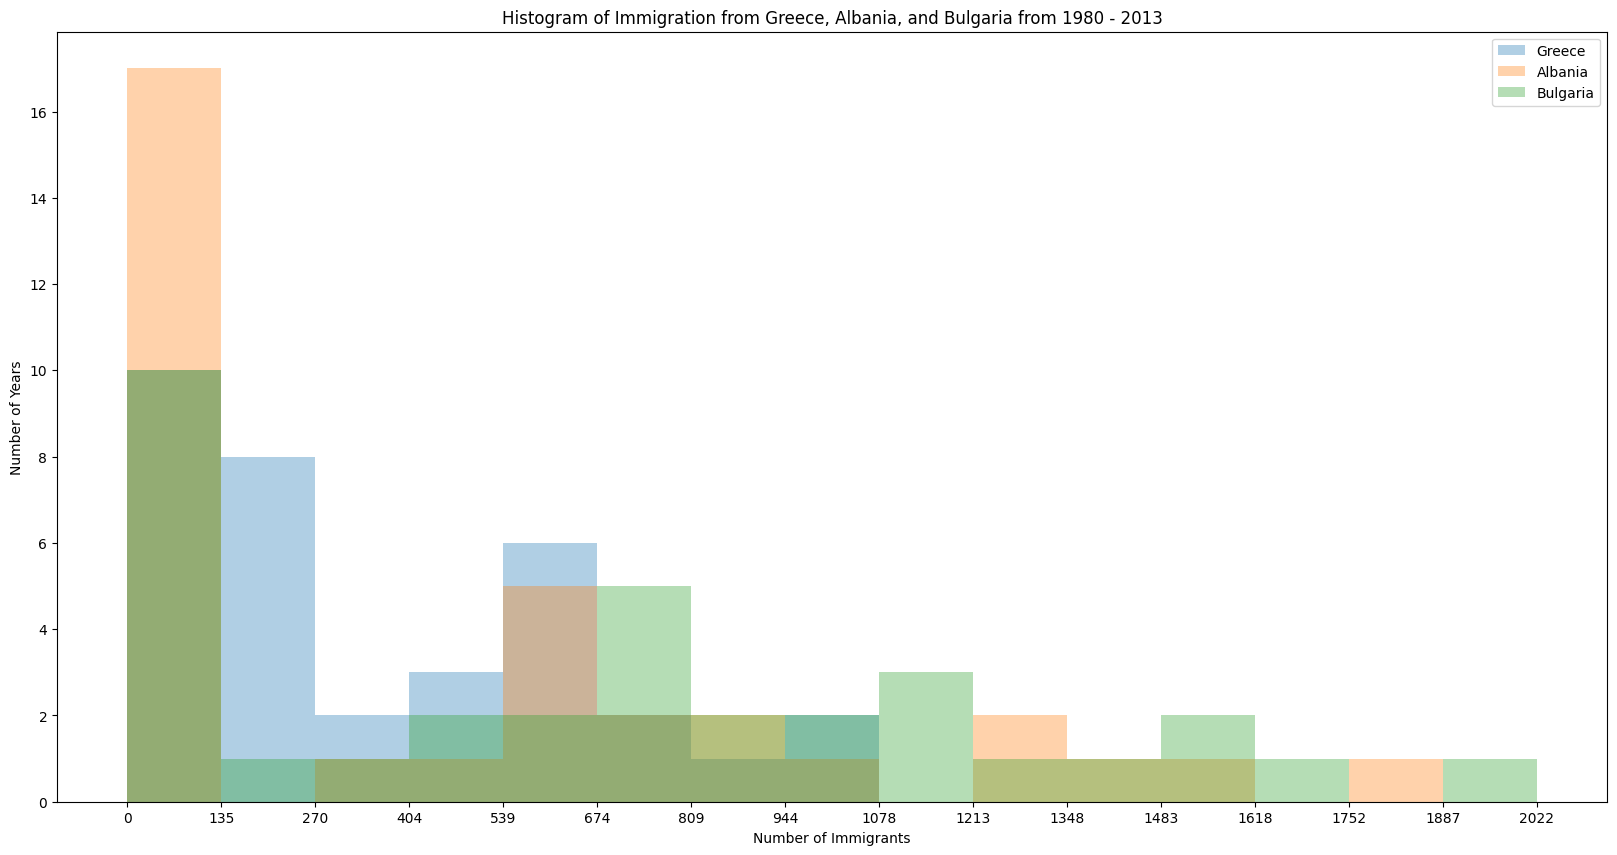

In [97]:
cont3.plot(kind='hist', alpha=0.35,bins=15,figsize=(20,10),xticks=bin_edges)
plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

BAR CHARTS  
Is a way of representing data where length of bar represents the magnitude/ size of feature/variable.  
Bar graph ususally presents numerical and categorial variables grouped in intervals

Text(0, 0.5, 'Number of immigrants')

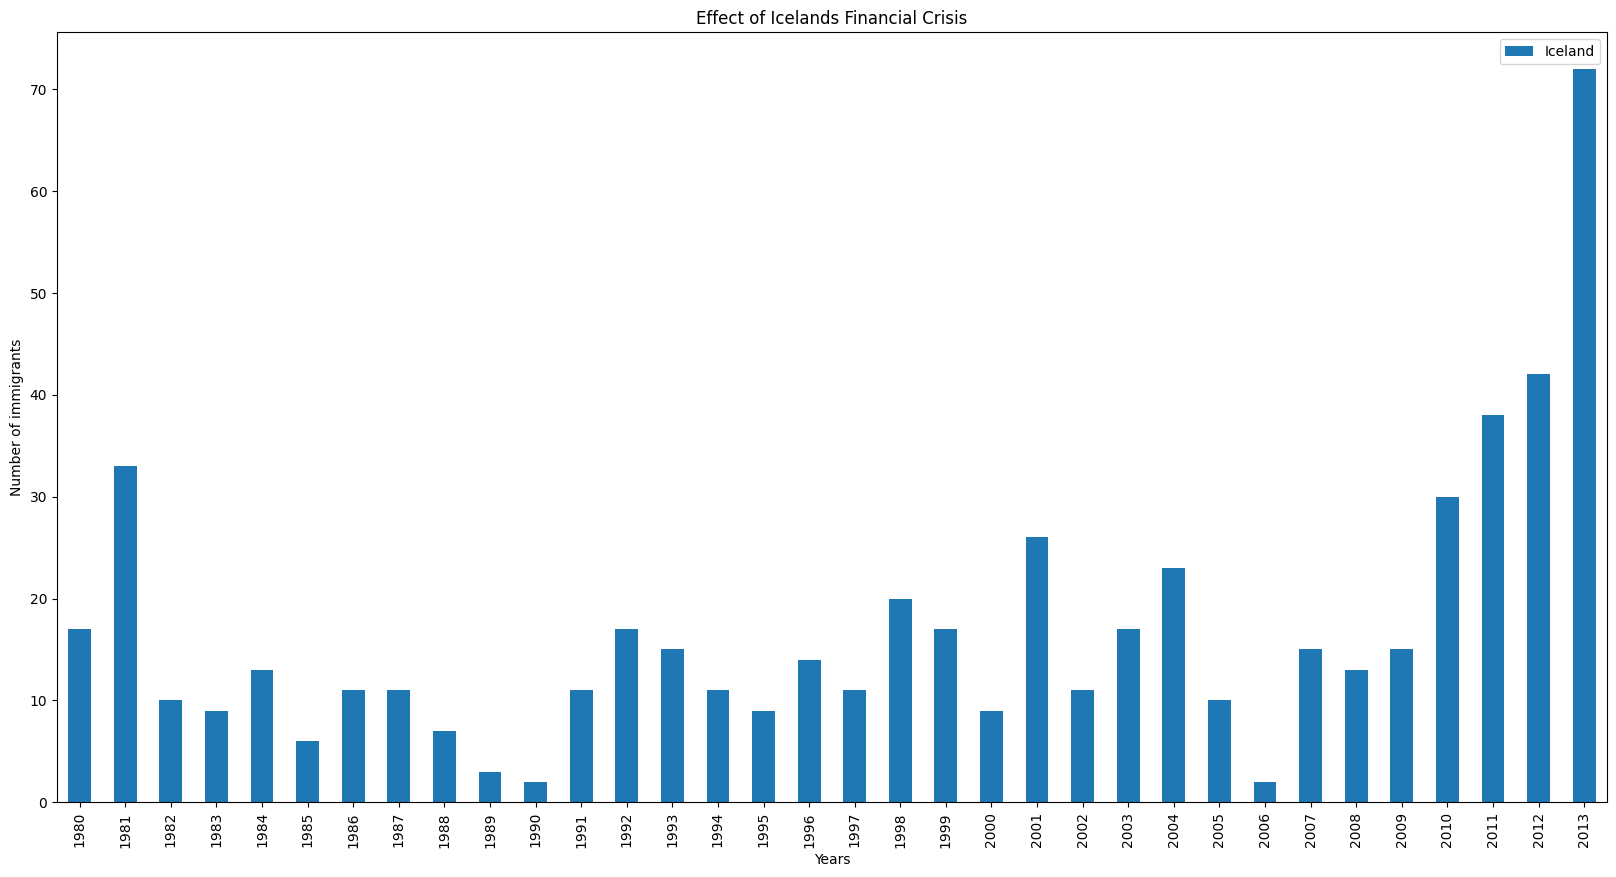

In [104]:
# Lets start off by analyzing effect of Iceland's Financial crisis
Ice = df_can.loc[['Iceland'],years].transpose()
Ice.plot(kind='bar', figsize=(20,10))
plt.title('Effect of Icelands Financial Crisis')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')

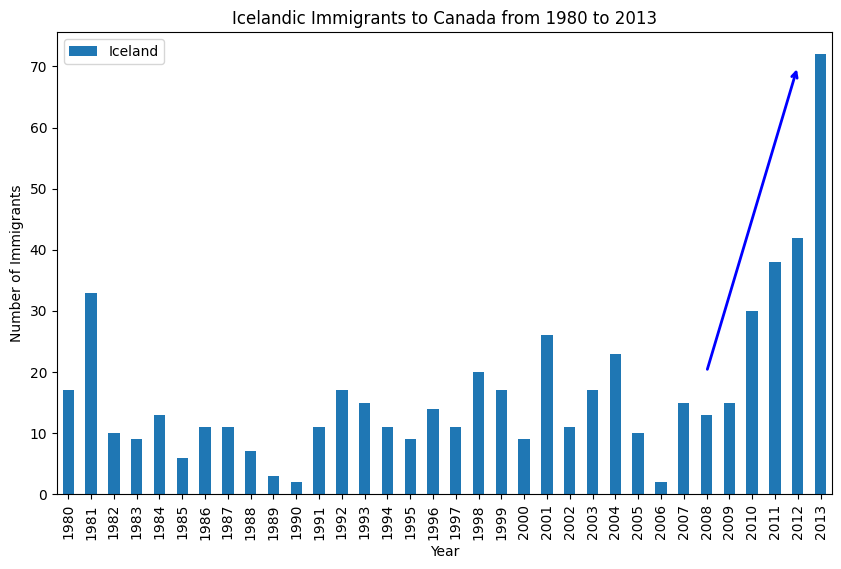

In [106]:
# The above bar plot clearly shows the affect on immigration due to financial crises after 2008. Lets annotate it
Ice.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

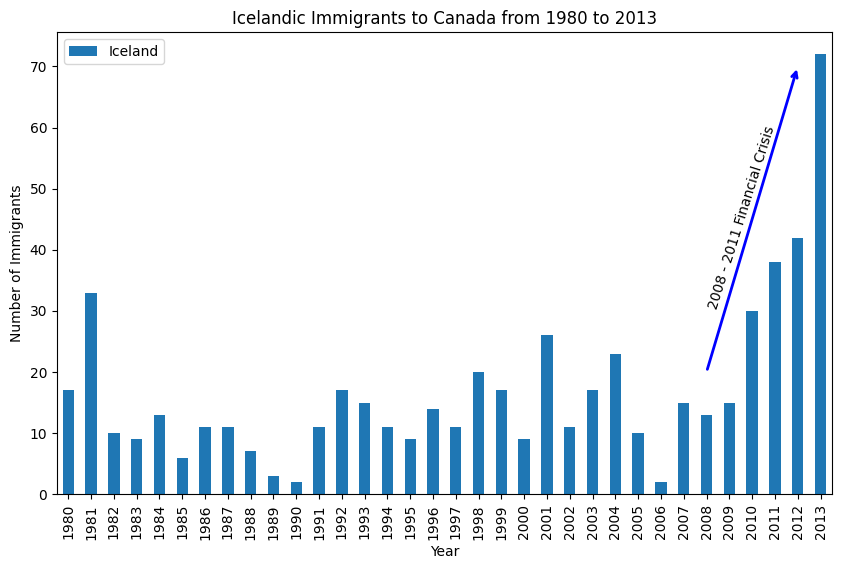

In [108]:
Ice.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

Horizontal Bar Plot  
Sometimes it is more practical to represent data horizontally, especially if you need more room for labelling the bars.

<Axes: >

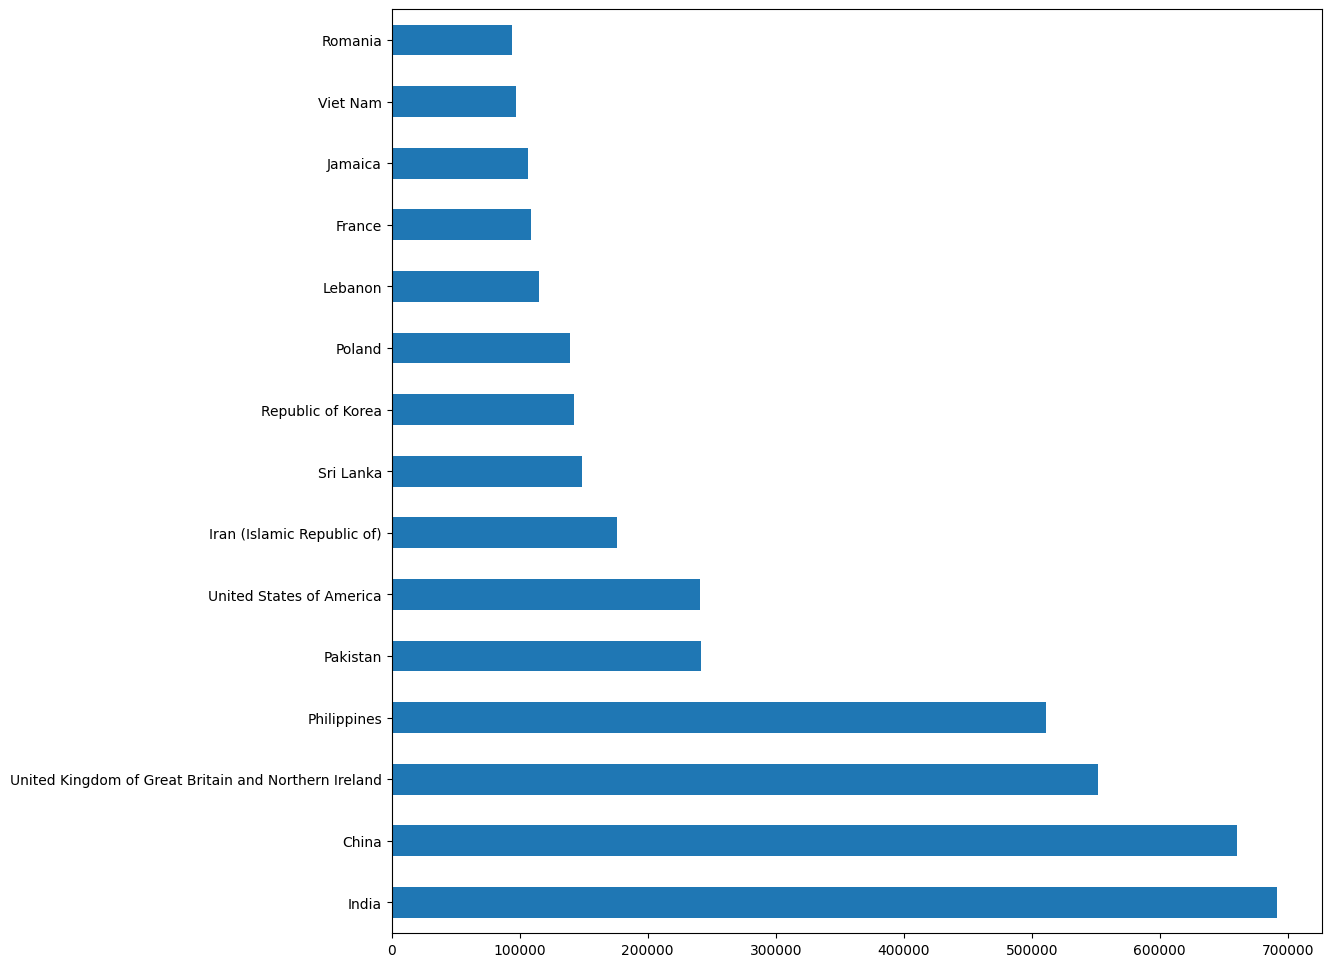

In [129]:
# Show total number of immigrants to Canada from top 15 countries by creating a horizontal bar graph
df_can.sort_values(by='Total', ascending=False,inplace=True)
top15 = df_can['Total'].head(15)
top15.plot(kind='barh',figsize=(12,12))